In [129]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [11]:
# importing data
headers = ['Movie', 'Genre', 'Description']
df = pd.read_csv('dataset/train_data.txt', delimiter=':::', engine='python', names=headers)

In [12]:
# visualizing the dataframe
df.head()

,Movie,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [14]:
# get df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [109]:
# number of films per genre
df['Genre'].value_counts()

Genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

In [126]:
sns.set(style='whitegrid')

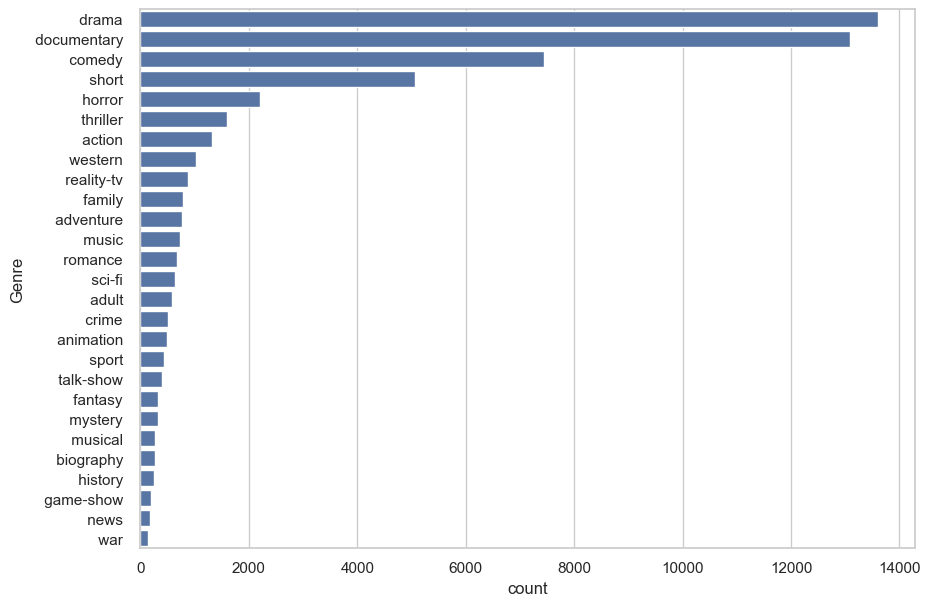

In [127]:
plt.figure(figsize=(10, 7))
sns.countplot(df['Genre'], order=df['Genre'].value_counts().index)
plt.show()

### Pre-processing 

In [119]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator).strip()

In [111]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pcteste1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pcteste1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [114]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.casefold() not in stop_words]
    return " ".join(filtered_text)

In [120]:
# testing both functions
text = "This is a sample sentence."
text = remove_stopwords(text)
remove_punctuation(text)

'sample sentence'

In [134]:
def preprocess_data(text):
    text = text.lower()

    # remove hyperlinks, email addresses, and non-characters
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)

    text = remove_punctuation(text)
    text = remove_stopwords(text)
    return text

In [137]:
text = "I live @ 127 Aracu St. Would you like to come visit any day?"
preprocess_data(text)

'live aracu st would like come visit day'

In [47]:
# splitting input an ouput vectors
X = df.drop(['Movie', 'Genre'], axis=1)
y = df['Genre']

In [48]:
# split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [53]:
X_train.head()

,Description
46277,Why do women fight? This riveting behind-the-...
23336,"Rancher Martin Auden's wife leaves him, his t..."
41251,FOR IZZY is a narrative feature drama filmed ...
44337,"Dis was Family an College Drama, A hero was s..."
1619,"""Hi, I am Tony"" is a horror thriller based on..."


In [87]:
# remove punctuation from training set
X_train['Description'] = X_train['Description'].apply(lambda x: remove_punctuation(x))

In [88]:
# remove punctuation from testing set
X_test['Description'] = X_test['Description'].apply(lambda x: remove_punctuation(x))

### 1.0 TF-IDF approach

In [102]:
vectorizer = TfidfVectorizer(stop_words=list(ENGLISH_STOP_WORDS), analyzer='word')
X_train_vectorized = vectorizer.fit_transform(X_train['Description'])
X_test_vectorized = vectorizer.transform(X_test['Description'])

In [103]:
print(X_test_vectorized.shape)
print(y_test.shape)

(8133, 136513)
(8133,)


#### 1.1 Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

In [105]:
model.score(X_train_vectorized, y_train)

0.7184956923677872

In [106]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(X_test_vectorized)

In [107]:
print("Precision:", precision_score(y_test, y_pred, average='micro'))
print("Recall:", recall_score(y_test, y_pred, average='micro'))
print("F1 Score:", f1_score(y_test, y_pred, average='micro'))

Precision: 0.5742038608139678
Recall: 0.5742038608139678
F1 Score: 0.5742038608139678
